## Observations and Insights 

In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge(mouse_metadata,study_results,on="Mouse ID",how="inner")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# Checking the number of mice.
n_mice = df.drop_duplicates(subset=['Mouse ID'], ignore_index=False).count()['Mouse ID']
n_mice

249

In [58]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dupe_mice_ids = df[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].drop_duplicates()
dupe_mice_ids


909    g989
Name: Mouse ID, dtype: object

In [59]:
# Optional: Get all the data for the duplicate mouse ID. 

dupe_mice = df[df.duplicated(['Mouse ID','Timepoint'])]
dupe_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [60]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = df[~df['Mouse ID'].isin(dupe_mice_ids)]

In [61]:
# Checking the number of mice in the clean DataFrame.
new_n_mice = cleaned_df.drop_duplicates(subset=['Mouse ID'], ignore_index=False).count()['Mouse ID']
new_n_mice 

248

## Summary Statistics

In [62]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_s = cleaned_df.groupby(by='Drug Regimen').mean()['Tumor Volume (mm3)']
median_s = cleaned_df.groupby(by='Drug Regimen').median()['Tumor Volume (mm3)']
variance_s = cleaned_df.groupby(by='Drug Regimen').var()['Tumor Volume (mm3)']
std_s = cleaned_df.groupby(by='Drug Regimen').std()['Tumor Volume (mm3)']
sem_s = cleaned_df.groupby(by='Drug Regimen').sem()['Tumor Volume (mm3)']
summary_df = pd.DataFrame()
summary_df['Mean'] = mean_s
summary_df['Median'] = median_s
summary_df['Variance'] = variance_s
summary_df['Standard Deviation'] = std_s
summary_df['SEM'] = sem_s

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
alt_summary_df = cleaned_df.groupby(by='Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
alt_summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

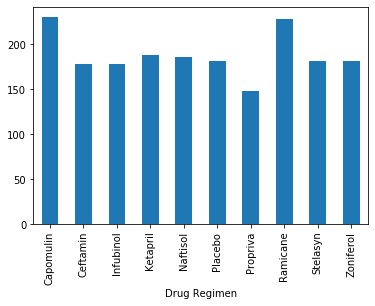

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_s = cleaned_df.groupby('Drug Regimen').count()['Timepoint']
bar_s.plot(kind="bar")

<BarContainer object of 10 artists>

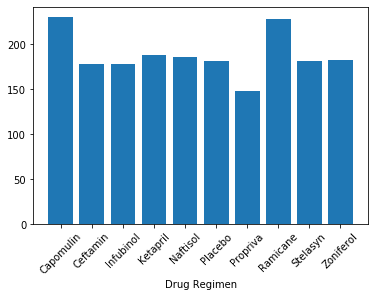

In [65]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = bar_s.index
y_axis = bar_s.values


plt.xlabel("Drug Regimen")
plt.xticks(rotation=45)
plt.bar(x_axis, y_axis)



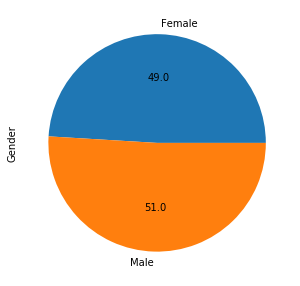

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
s = cleaned_df.groupby(by="Sex").count()['Mouse ID']
s = s.rename("Gender")
s.plot.pie(figsize=(5, 5), autopct='%.1f')



([<matplotlib.patches.Wedge at 0x28869efe108>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.0'),
  Text(-0.018044734954153905, -0.5997285948997549, '51.0')])

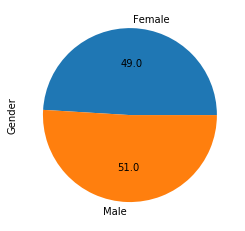

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = s.values
plt.axes().set_ylabel('Gender')
plt.pie(values, labels=['Female','Male'], autopct='%.1f')


## Quartiles, Outliers and Boxplots

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_cleaned_df = cleaned_df[cleaned_df['Drug Regimen'].isin(regimens)]
final_timepoints_s = filtered_cleaned_df.groupby(by='Mouse ID')['Timepoint'].max()
final_timepoints_s
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_df = cleaned_df.merge(final_timepoints_s, how='inner', on=['Mouse ID', 'Timepoint'])
final_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [69]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_volume_s = final_df[final_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # add subset 
    quartiles = regimen_volume_s.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    print(f"IQR: {iqr}")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    are_outliers = regimen_volume_s.min() < lower_bound or regimen_volume_s.max() > upper_bound
    print(f"Outliers: {are_outliers}")

    # Determine outliers using upper and lower bounds
    lower_outliers_s = regimen_volume_s[regimen_volume_s < lower_bound]
    upper_outliers_s = regimen_volume_s[regimen_volume_s > upper_bound]
    all_outliers_s = pd.concat([lower_outliers_s,upper_outliers_s])
    print(regimen + ':')
    print(all_outliers_s)

IQR: 7.781863460000004
Outliers: False
Capomulin:
Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR: 9.098536719999998
Outliers: False
Ramicane:
Series([], Name: Tumor Volume (mm3), dtype: float64)
IQR: 11.477135160000003
Outliers: True
Infubinol:
58    36.321346
Name: Tumor Volume (mm3), dtype: float64
IQR: 15.577752179999997
Outliers: False
Ceftamin:
Series([], Name: Tumor Volume (mm3), dtype: float64)


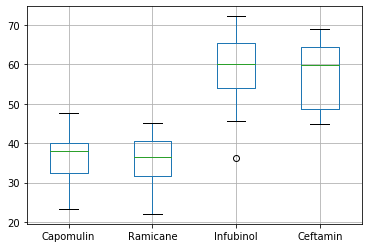

In [77]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = []
for regimen in regimens:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    regimen_volume_s = final_df[final_df['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    data.append(regimen_volume_s.tolist())
    
df = pd.DataFrame(data)
df = df.transpose()
df.columns = regimens
df.boxplot(column=regimens)
    
    

## Line and Scatter Plots

In [78]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_volume_s = final_df[final_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
capomulin_volume_s

1     23.343598
2     28.484033
3     28.430964
6     30.485985
10    31.023923
12    31.896238
13    32.377357
14    33.329098
16    34.455298
20    37.311846
22    36.041047
24    37.074024
28    38.846876
30    38.939633
31    38.982878
32    38.753265
34    38.125164
35    39.952347
36    40.658124
37    40.159220
38    40.728578
39    41.483008
40    41.581521
45    47.685963
82    46.539206
Name: Tumor Volume (mm3), dtype: float64

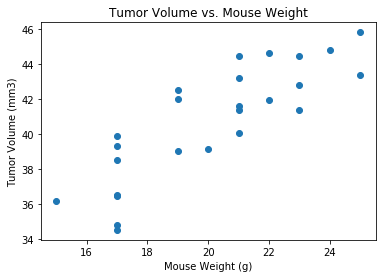

In [82]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = cleaned_df[cleaned_df['Drug Regimen'] == 'Capomulin']
average_tumor_volume_df = capomulin_df.groupby(by='Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]
plt.scatter(average_tumor_volume_df['Weight (g)'], average_tumor_volume_df['Tumor Volume (mm3)'])
plt.title("Tumor Volume vs. Mouse Weight")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [84]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight_s = average_tumor_volume_df['Weight (g)']
volume_s = average_tumor_volume_df['Tumor Volume (mm3)']
correlation_cefficient = weight_s.corr(volume_s)
print(correlation_cefficient)
m,b = np.polyfit(weight_s.tolist(), volume_s.tolist(), 1)
print(f"Slope:{m}")
print(f"b:{b}")

0.8419363424694717
Slope:0.9544396890241045
b:21.55216053268501
